**Import necessary libraries**
- pandas is for data manipulation
- matplotlib is for visual representation
- requests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False)  



In [2]:
# get current price data
def get_current_data(from_sym='BTC', to_sym='USD', exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price'    
    
    parameters = {'fsym': from_sym,
                  'tsyms': to_sym }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    
    return data 

In [3]:
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'day', limit=2000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 
    
    return data 

In [4]:
def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df.tail())
    
    return df

In [5]:
def plot_data(df, cryptocurrency, target_currency):
    # got his warning because combining matplotlib 
    # and time in pandas converted from epoch to normal date
    # To register the converters:
    # 	>>> from pandas.plotting import register_matplotlib_converters
    # 	>>> register_matplotlib_converters()
    #  warnings.warn(msg, FutureWarning)
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None

baseurl:  https://min-api.cryptocompare.com/data/v2/histoday
timeframe:  day
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}
                high       low      open  volumefrom      volumeto     close conversionType conversionSymbol
time                                                                                                        
2022-09-30  20180.46  19201.02  19593.46    73013.93  1.428754e+09  19425.63         direct                 
2022-10-01  19482.38  19188.77  19425.63    14808.24  2.860916e+08  19313.96         direct                 
2022-10-02  19394.33  18929.91  19313.96    25352.29  4.857993e+08  19058.15         direct                 
2022-10-03  19697.23  18988.80  19058.15    57248.95  1.106456e+09  19632.35         direct                 
2022-10-04  19723.87  19499.64  19632.35     7341.08  1.438743e+08  19619.73         direct                 


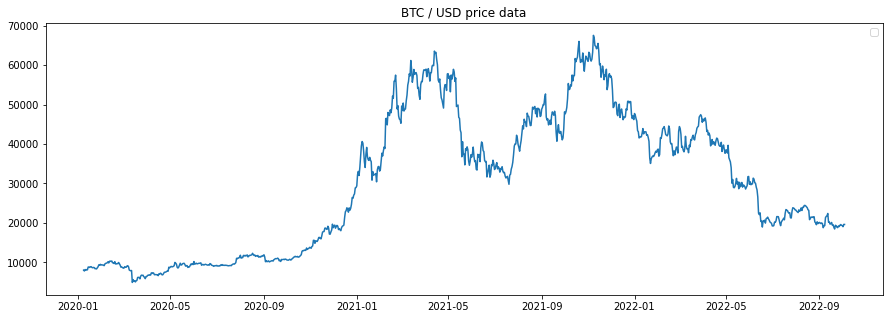

In [6]:
cryptocurrency = 'BTC'
target_currency = 'USD'

data = get_hist_data(cryptocurrency, target_currency, 'day', 1000)
df = data_to_dataframe(data)

plot_data(df, cryptocurrency, target_currency)

In [7]:

data_to_dataframe(get_hist_data(cryptocurrency, target_currency, 'minute', 5))

baseurl:  https://min-api.cryptocompare.com/data/v2/histominute
timeframe:  minute
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 5, 'aggregate': 1}
                         high       low      open  volumefrom   volumeto     close conversionType conversionSymbol
time                                                                                                              
2022-10-04 05:50:00  19628.84  19624.70  19624.70       7.131  139949.85  19625.96         direct                 
2022-10-04 05:51:00  19625.96  19621.85  19625.96       7.248  142240.63  19625.13         direct                 
2022-10-04 05:52:00  19626.97  19622.28  19625.13       4.933   96818.73  19624.15         direct                 
2022-10-04 05:53:00  19625.17  19616.40  19624.15      41.800  820015.71  19622.72         direct                 
2022-10-04 05:54:00  19622.72  19619.58  19622.72       0.000       0.00  19619.58         direct                 


,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2022-10-04 05:49:00,19624.70,19619.34,19620.58,13.510,265098.83,19624.70,direct,
2022-10-04 05:50:00,19628.84,19624.70,19624.70,7.131,139949.85,19625.96,direct,
2022-10-04 05:51:00,19625.96,19621.85,19625.96,7.248,142240.63,19625.13,direct,
2022-10-04 05:52:00,19626.97,19622.28,19625.13,4.933,96818.73,19624.15,direct,
2022-10-04 05:53:00,19625.17,19616.40,19624.15,41.800,820015.71,19622.72,direct,
2022-10-04 05:54:00,19622.72,19619.58,19622.72,0.000,0.00,19619.58,direct,
